### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [304]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,
id2875421,1,930.399753,0,455.0,1.500479
id2377394,0,930.399753,0,663.0,1.807119
id3858529,1,930.399753,0,2124.0,6.392080
id3504673,1,930.399753,0,429.0,1.487155
id2181028,1,930.399753,0,435.0,1.189925


In [305]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [306]:
initial_data.shape[0] == processed_data.shape[0]

True

In [307]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [308]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [309]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [310]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

In [311]:
processed_data = processed_data.assign(log_trip_duration=np.log1p(processed_data['trip_duration']))

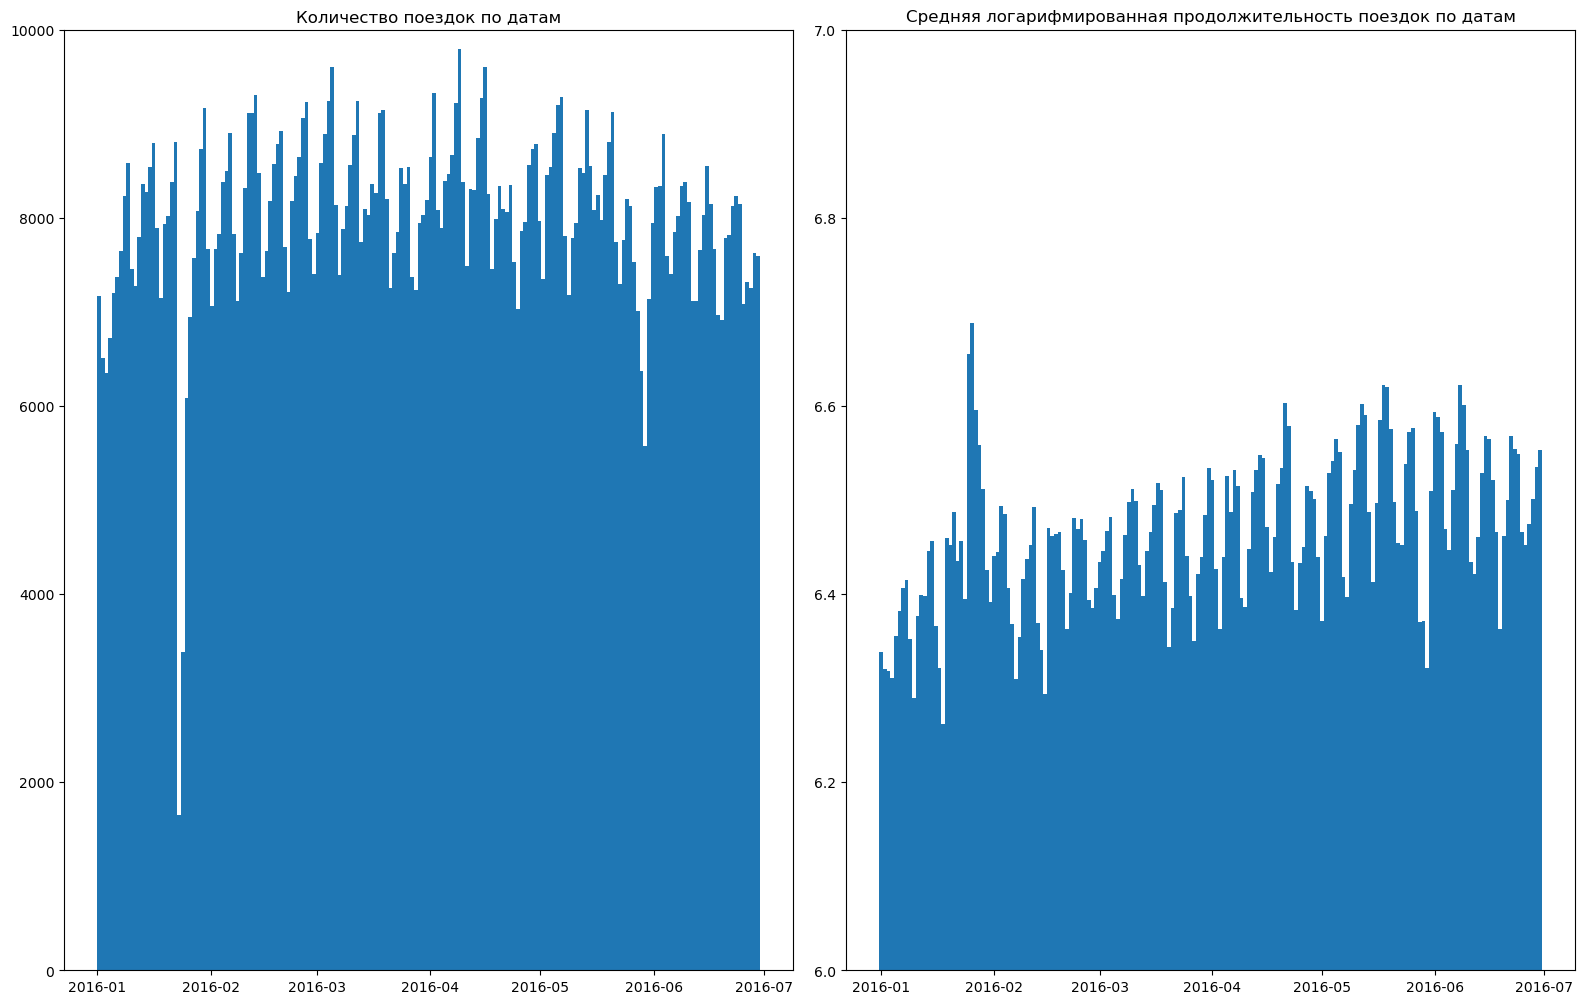

In [312]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((0, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


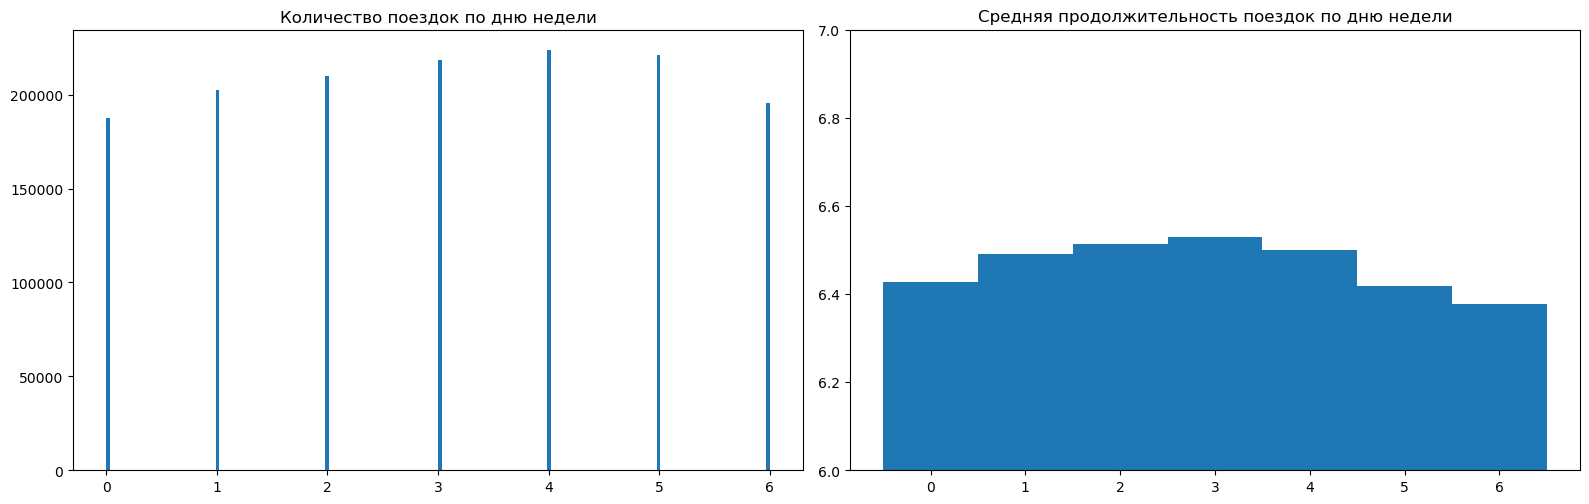

In [313]:
fig = plt.figure()

fig.set_size_inches(16, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.date.unique().shape[0])


ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дню недели')
ax_2.set(title = 'Средняя продолжительность поездок по дню недели')

plt.show()

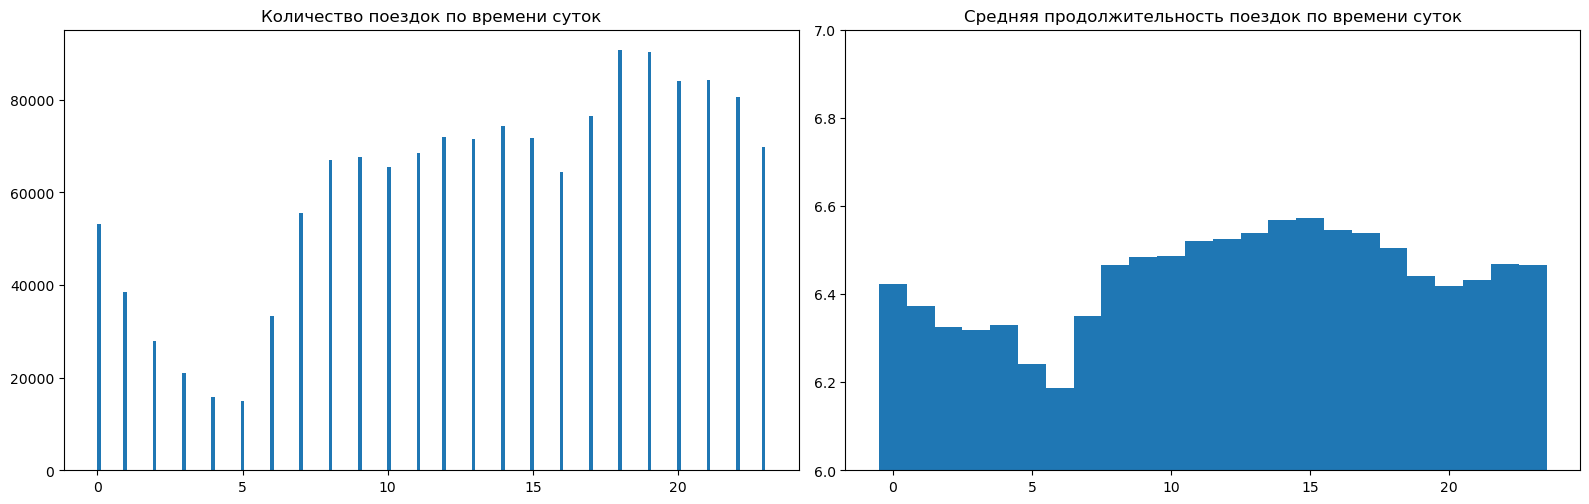

In [314]:
fig = plt.figure()

fig.set_size_inches(16, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.date.unique().shape[0])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по времени суток')
ax_2.set(title = 'Средняя продолжительность поездок по времени суток')

plt.show()

Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)


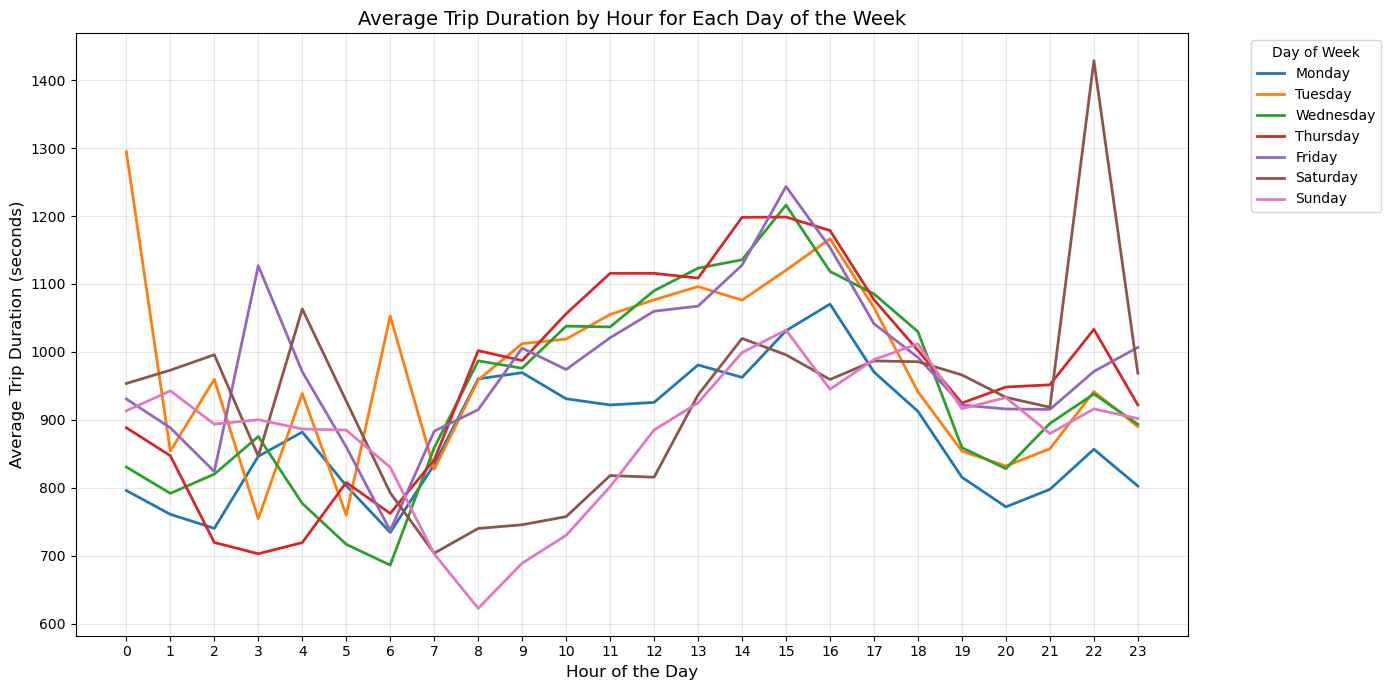

In [315]:
grouped = processed_data.groupby(['day_of_week', 'hour'])['trip_duration'].mean().unstack(level=0)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 7))

for i, day in enumerate(days):
    plt.plot(grouped.index, grouped[i], label=day, linewidth=2)

# Настройки графика
plt.title('Average Trip Duration by Hour for Each Day of the Week', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Trip Duration (seconds)', fontsize=12)
plt.xticks(np.arange(0, 24, 1))  
plt.grid(alpha=0.3) 
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')  

plt.tight_layout()  
plt.show()

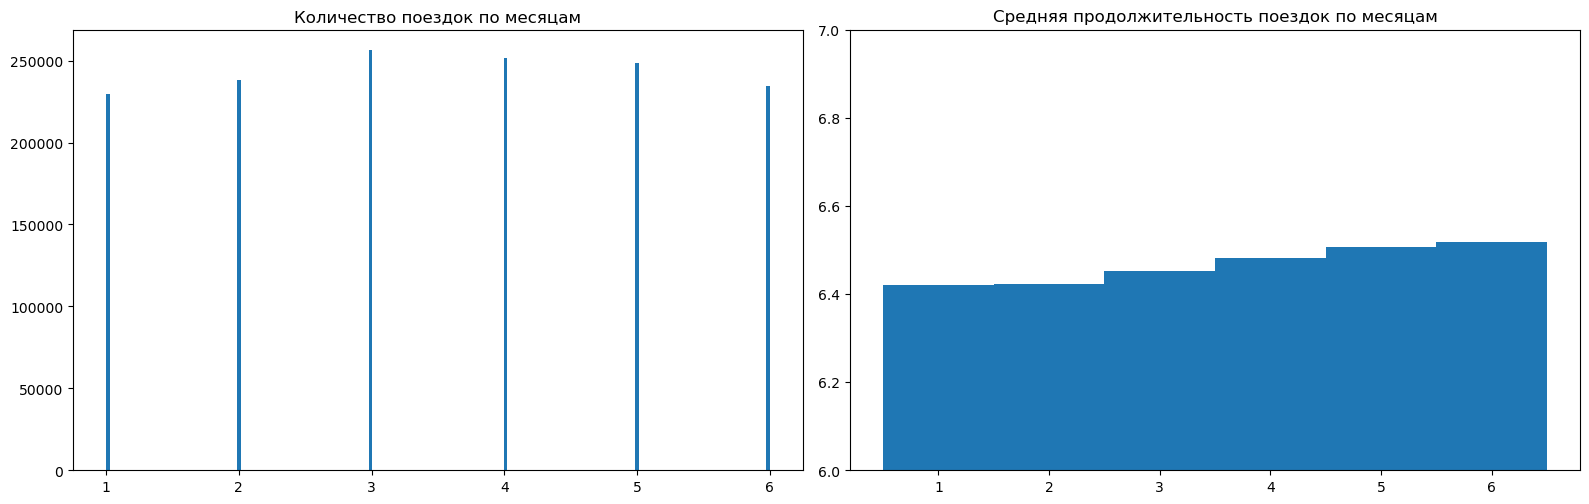

In [316]:
fig = plt.figure()

fig.set_size_inches(16, 5)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins=processed_data.date.unique().shape[0])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['month'].unique())), 
        processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцам')
ax_2.set(title = 'Средняя продолжительность поездок по месяцам')

plt.show()

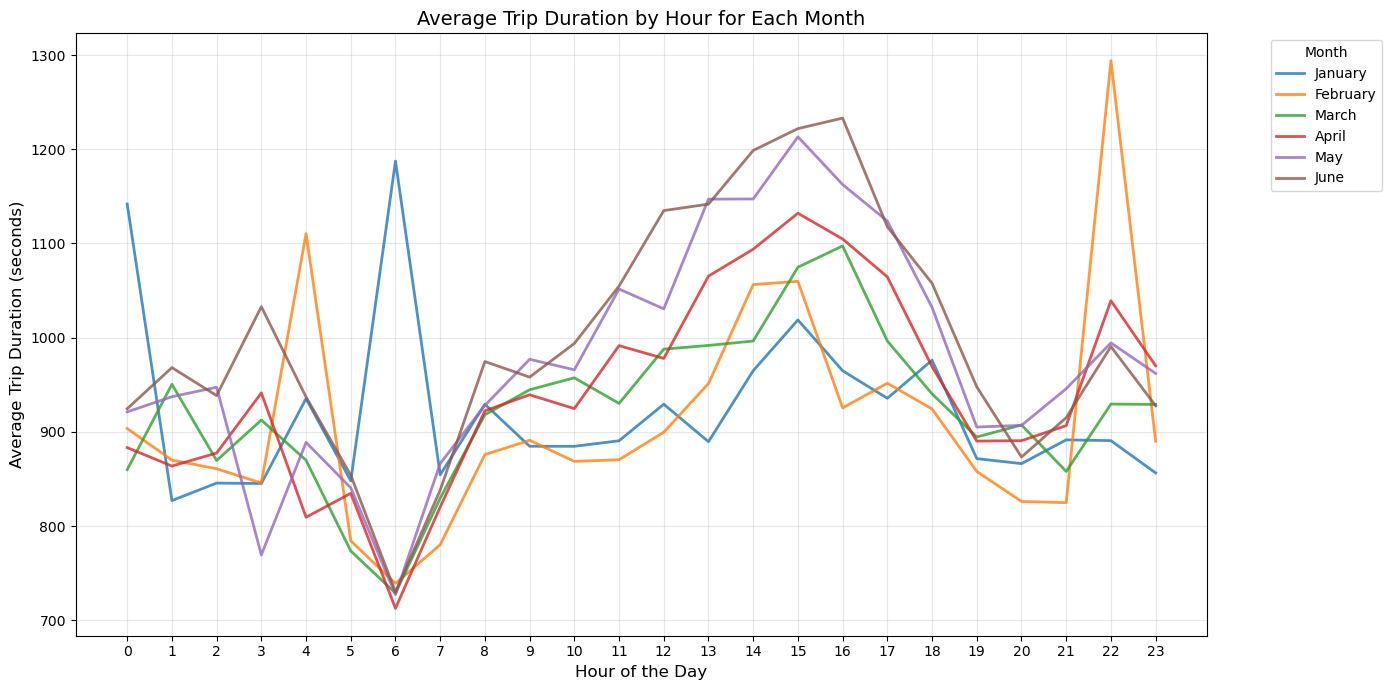

In [317]:
import calendar  

grouped = processed_data.groupby(['month', 'hour'])['trip_duration'].mean().unstack(level=0)

month_names = list(calendar.month_name)[1:]  # ['January', 'February', ..., 'December']

plt.figure(figsize=(14, 7))

for month in range(1, 13):  
    if month in grouped.columns: 
        plt.plot(
            grouped.index,
            grouped[month],
            label=month_names[month - 1],
            linewidth=2,
            alpha=0.8,
        )

# Настройки графика
plt.title('Average Trip Duration by Hour for Each Month', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Trip Duration (seconds)', fontsize=12)
plt.xticks(np.arange(0, 24, 1)) 
plt.grid(alpha=0.3)  
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 
plt.show()

Ящики с усами для различных: времени суток, дня недели, месяца


In [318]:
hour_dict = {}

for i in processed_data['hour'].unique():
    hour_dict[i] = processed_data[processed_data['hour']==i]['trip_duration']
    
hour_dict = {k: hour_dict[k] for k in sorted(hour_dict)}

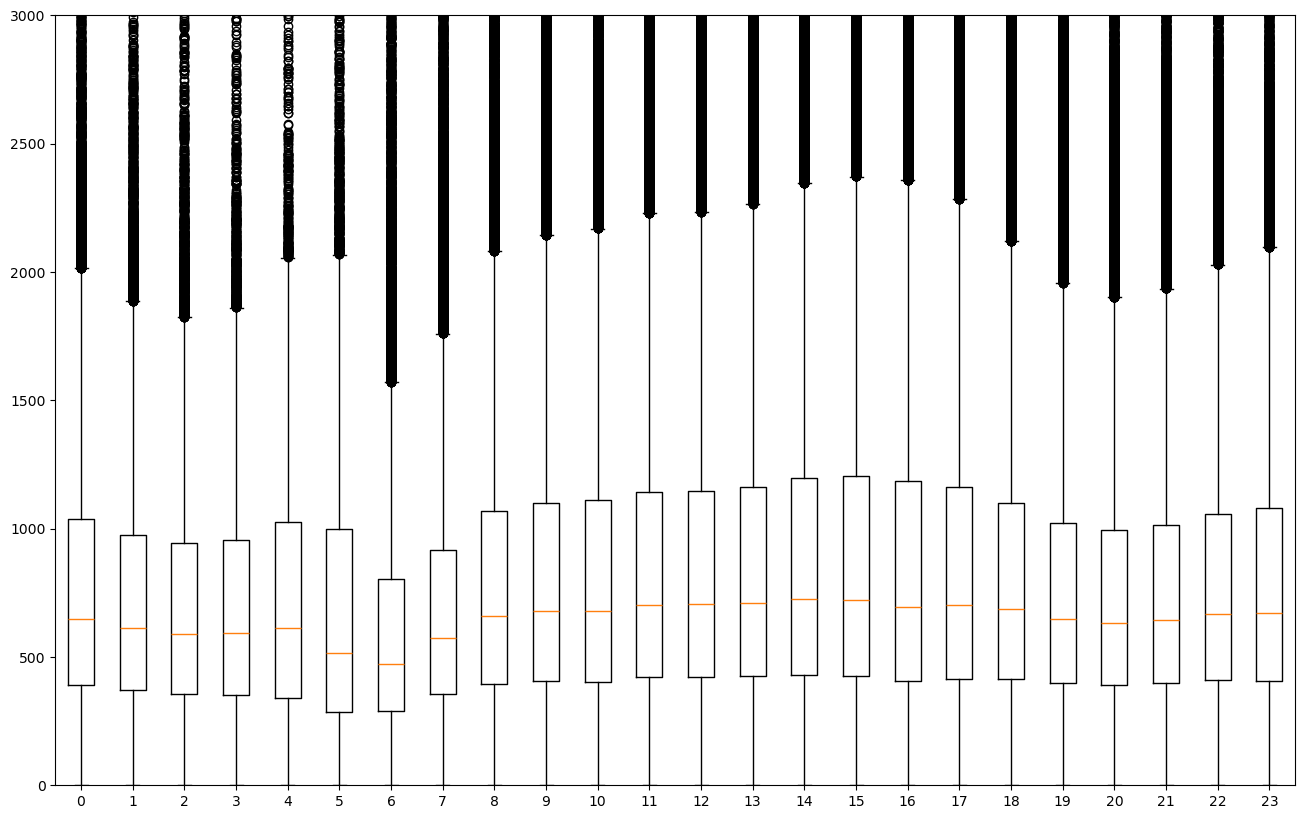

In [319]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot(hour_dict.values(),
            labels=hour_dict.keys())

plt.ylim((0, 3000))

plt.show()

In [320]:
day_of_week_dict = {}

for i in processed_data['day_of_week'].unique():
    day_of_week_dict[i] = processed_data[processed_data['day_of_week']==i]['trip_duration']
    
day_of_week_dict = {k: day_of_week_dict[k] for k in sorted(day_of_week_dict)}

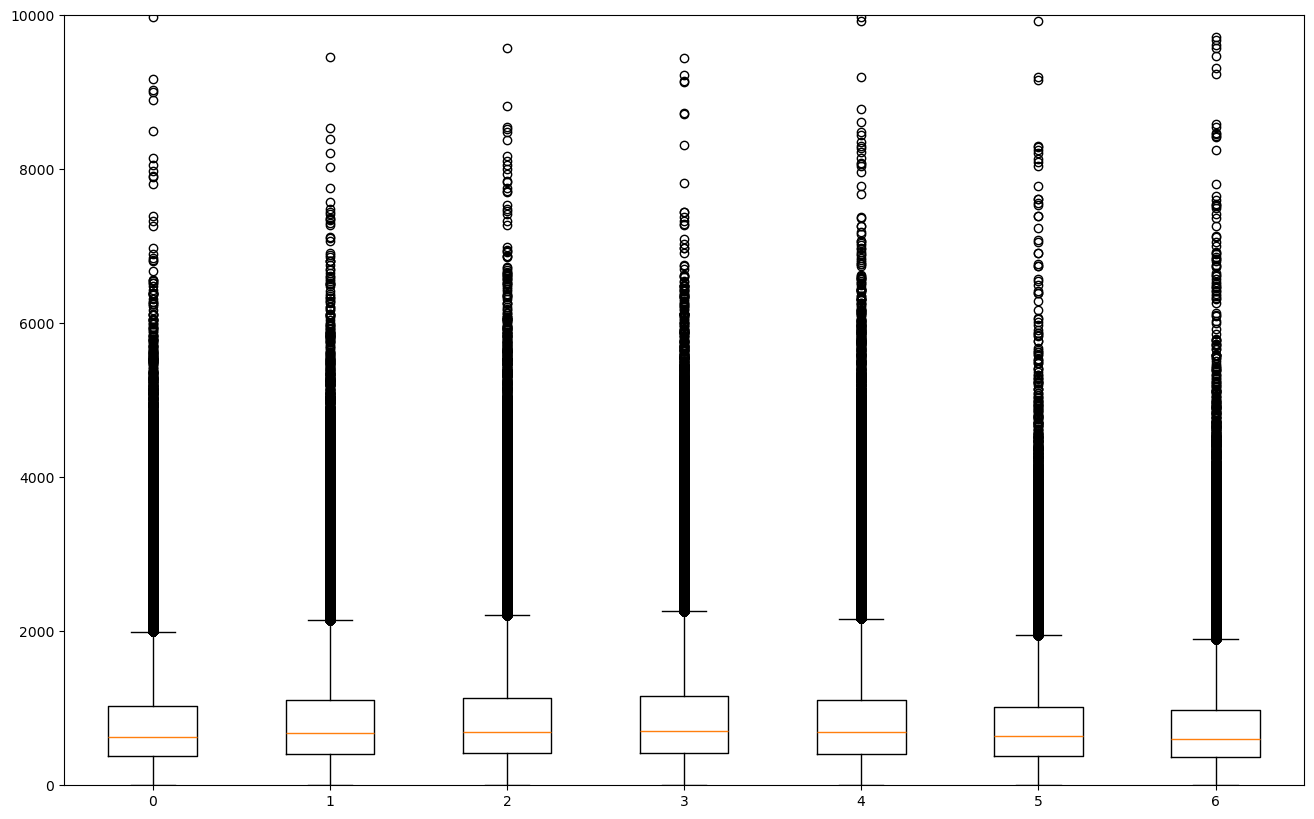

In [321]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot(day_of_week_dict.values(),
            labels=day_of_week_dict.keys())

plt.ylim((0, 10000))

plt.show()

In [322]:
month_dict = {}

for i in processed_data['month'].unique():
    month_dict[i] = processed_data[processed_data['month']==i]['trip_duration']
    
month_dict = {k: month_dict[k] for k in sorted(month_dict)}

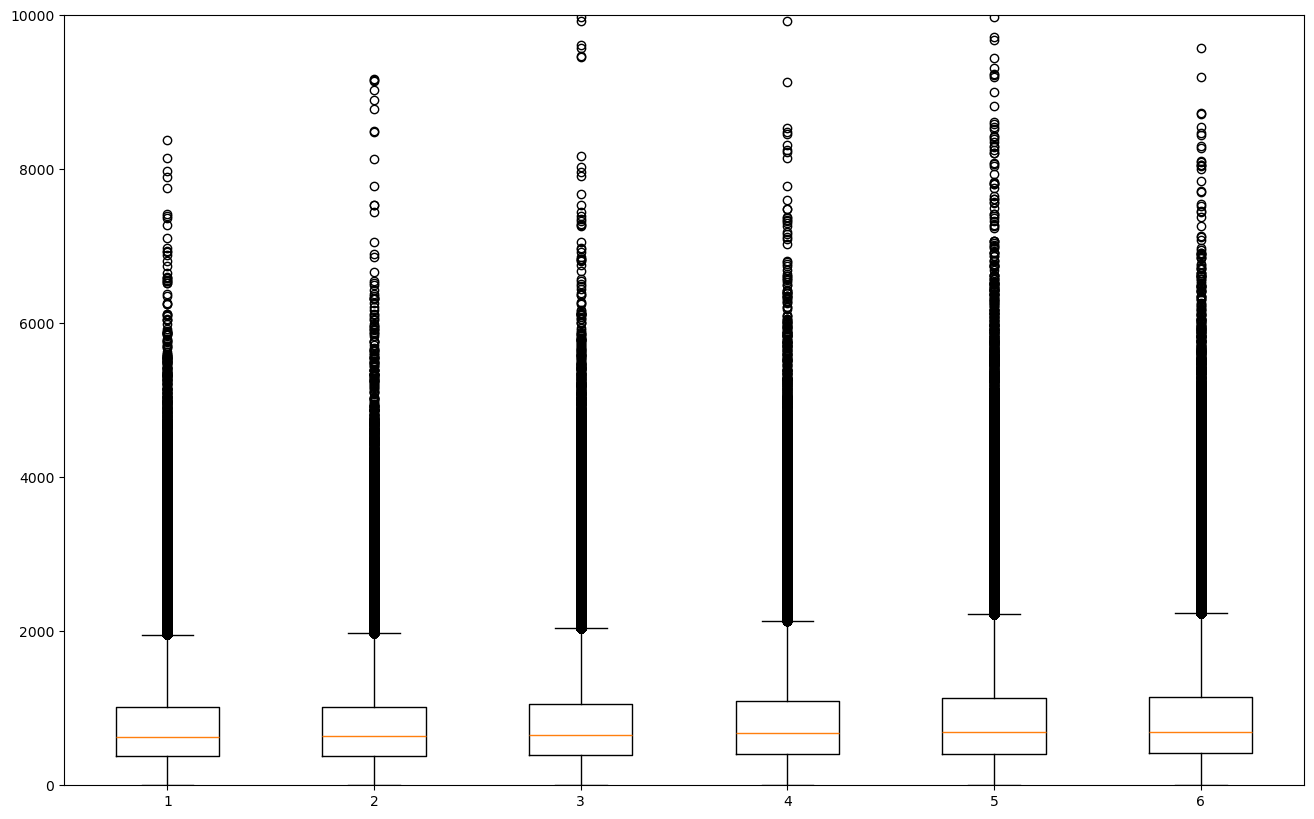

In [323]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot(month_dict.values(),
            labels=month_dict.keys())

plt.ylim((0, 10000))

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

Нахожу дни, в которых было меньше всего поездок: (2016-01-23)

In [324]:
processed_data.groupby('date', as_index=False)['trip_duration'].count().rename(columns={'trip_duration': 'trip_count'}).sort_values('trip_count').head() 

,date,trip_count
22,2016-01-23,1648
23,2016-01-24,3383
150,2016-05-30,5570
24,2016-01-25,6084
2,2016-01-03,6353


In [325]:
storm_date = pd.to_datetime('2016-01-23')

In [326]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = (processed_data['date'] == storm_date).astype(int)
processed_data.head()

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration,anomaly
id,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493,0
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282,0
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527,0
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785,0
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642,0


In [327]:
processed_data['anomaly'].value_counts()

0    1456996
1       1648
Name: anomaly, dtype: int64

In [328]:
# Группируем по дню недели и часу, считаем среднюю длительность
problematic_times = processed_data.groupby(['day_of_week', 'hour'])['trip_duration'].mean().reset_index()

# Сортируем по убыванию длительности и берем топ-10
top_10_problematic = problematic_times.sort_values('trip_duration', ascending=False).head(10)

top_10_problematic

,day_of_week,hour,trip_duration
142,5,22,1428.600760
24,1,0,1294.658012
111,4,15,1243.382583
63,2,15,1216.085452
87,3,15,1198.523408
86,3,14,1198.079901
88,3,16,1178.662785
40,1,16,1166.544703
112,4,16,1153.710774
62,2,14,1135.571011


In [329]:
### Создадим второй бинарный признак
### Your code is here
problematic_pairs = set(zip(top_10_problematic['day_of_week'], top_10_problematic['hour']))

processed_data['traffic_jam'] = processed_data.apply(
    lambda row: 1 if (row['day_of_week'], row['hour']) in problematic_pairs else 0,
    axis=1
)

In [330]:
processed_data['traffic_jam'].value_counts()

0    1363001
1      95643
Name: traffic_jam, dtype: int64

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [331]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [332]:
### Делаем OneHotEncoding и конкатим с processed_data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  

for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here
    encoded_array = encoder.fit_transform(processed_data[[col]])
    
    # Создаем названия для новых колонок
    feature_names = encoder.get_feature_names_out([col])
    
    # Создаем DataFrame с закодированными признаками
    encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=processed_data.index)
    
    # Конкатим с основным DataFrame
    processed_data = pd.concat([processed_data, encoded_df], axis=1)
processed_data.head()    

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,day_of_week,hour,month,log_trip_duration,anomaly,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,0,17,3,6.122493,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
id2377394,0,930.399753,0,663.0,1.807119,6,0,6,6.498282,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
id3858529,1,930.399753,0,2124.0,6.392080,1,11,1,7.661527,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id3504673,1,930.399753,0,429.0,1.487155,2,19,4,6.063785,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
id2181028,1,930.399753,0,435.0,1.189925,5,13,3,6.077642,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [333]:
processed_data = processed_data.drop(['day_of_week', 'hour', 'month', 'log_trip_duration'], axis=1) 
processed_data.head() 

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
id2377394,0,930.399753,0,663.0,1.807119,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
id3858529,1,930.399753,0,2124.0,6.392080,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id3504673,1,930.399753,0,429.0,1.487155,0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
id2181028,1,930.399753,0,435.0,1.189925,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [334]:
processed_data.head(5).to_csv('intermediate_data.csv', sep=',', index=False)

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними.

In [335]:
### Your code is here
pd.concat((processed_data['distance_km'], processed_data['passenger_count']), axis=1).corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [336]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(processed_data.drop(columns=['trip_duration'], axis=1), processed_data['trip_duration'])

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [337]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['vendor_id', 'distance_km', 'traffic_jam', 'hour_5', 'hour_6'],
      dtype=object)

In [345]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = processed_data_encoded[sfs.get_feature_names_out()]
y = processed_data_encoded['trip_duration']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

mse

27166439.95376076